# Prediction on the final Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import preprocessing
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score

/Users/leforestierlucas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/leforestierlucas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [44]:
df = pd.read_csv("../clean_data/final_df.csv", index_col= 0)
df.drop(["Company","Region"], axis = 1, inplace = True)
df.rename({"Value":"CompanySpend", "Spendings":"TotalSpend"}, axis=1, inplace=True)
df= pd.get_dummies(df, columns=["Device", "Market", "SubMarket"], drop_first=True)
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)
df

,Year,CompanySpend,TotalSpend,DevSpends,MarketSpends,SubMarketSpends,Cogs,Cogs_1,Cogs_2,Revenue,...,SubMarket_Other Peripherals,SubMarket_Other Storage,SubMarket_Other Wired,SubMarket_Other Wireless,SubMarket_Power & Energy,SubMarket_STB,SubMarket_TV,SubMarket_Tablet PCs,SubMarket_Test & Measurement,SubMarket_Video Games
0,2018,7.466000,200.530,172603.835,744408.882,59122.300,19059.000000,17278.000000,17270.00,27662.00,...,0,0,0,0,1,0,0,0,0,0
1,2019,8.471900,189.490,163733.518,694336.713,56477.645,19018.000000,19059.000000,17278.00,27978.00,...,0,0,0,0,1,0,0,0,0,0
2,2020,8.661150,195.081,163007.011,715358.270,58137.779,18123.000000,19018.000000,19059.00,26134.00,...,0,0,0,0,1,0,0,0,0,0
3,2021,10.090255,240.245,212172.612,898036.093,67325.066,19407.000000,18123.000000,19018.00,28945.00,...,0,0,0,0,1,0,0,0,0,0
4,2022,10.040442,257.635,242620.053,1010453.110,73245.445,19712.000000,19407.000000,18123.00,29446.00,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25932,2020,10.295800,282.999,459595.802,185313.426,21204.000,758.240000,658.360000,518.61,1430.40,...,0,0,0,0,0,0,0,0,0,0
25933,2021,17.639800,399.001,592814.876,245426.412,27436.000,1013.470000,758.240000,658.36,1565.00,...,0,0,0,0,0,0,0,0,0,0
25934,2022,23.717500,469.001,651481.707,262578.290,33706.038,825.470000,1013.470000,758.24,1183.40,...,0,0,0,0,0,0,0,0,0,0
25935,2023,23.067700,412.999,623323.575,211583.273,25612.000,60182.035714,825.470000,1013.47,990.27,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X_train = df[(df.Year<=2022)]
X_test = df[(df.Year>=2023)]
y_train = X_train.pop("CompanySpend")
y_test = X_test.pop("CompanySpend")
X_train.drop(["Year"], axis=1, inplace=True)
X_test.drop(["Year"], axis=1, inplace=True)

/var/folders/px/tjlhxsg56bg6d74d3c4cnhrc0000gn/T/ipykernel_56238/2512413128.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(["Year"], axis=1, inplace=True)
/var/folders/px/tjlhxsg56bg6d74d3c4cnhrc0000gn/T/ipykernel_56238/2512413128.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(["Year"], axis=1, inplace=True)


### Linear Regression

In [49]:
X_bis = sm.add_constant(np.asarray(X_train).astype('float64'))
est = sm.OLS(np.asarray(y_train).astype('float64'), X_bis)
reg = est.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     81.08
Date:                Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:23:03   Log-Likelihood:            -1.0365e+05
No. Observations:               17768   AIC:                         2.074e+05
Df Residuals:                   17718   BIC:                         2.078e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2323      2.980     -0.749      0.4

### CART

In [22]:
model_cart = DecisionTreeRegressor(max_depth=6, min_samples_leaf=5)
model_cart.fit(X_train, y_train)
r2_score(y_train, model_cart.predict(X_train))

0.8263664074287167

In [23]:
r2_score(y_test, model_cart.predict(X_test))

0.4620109698256417

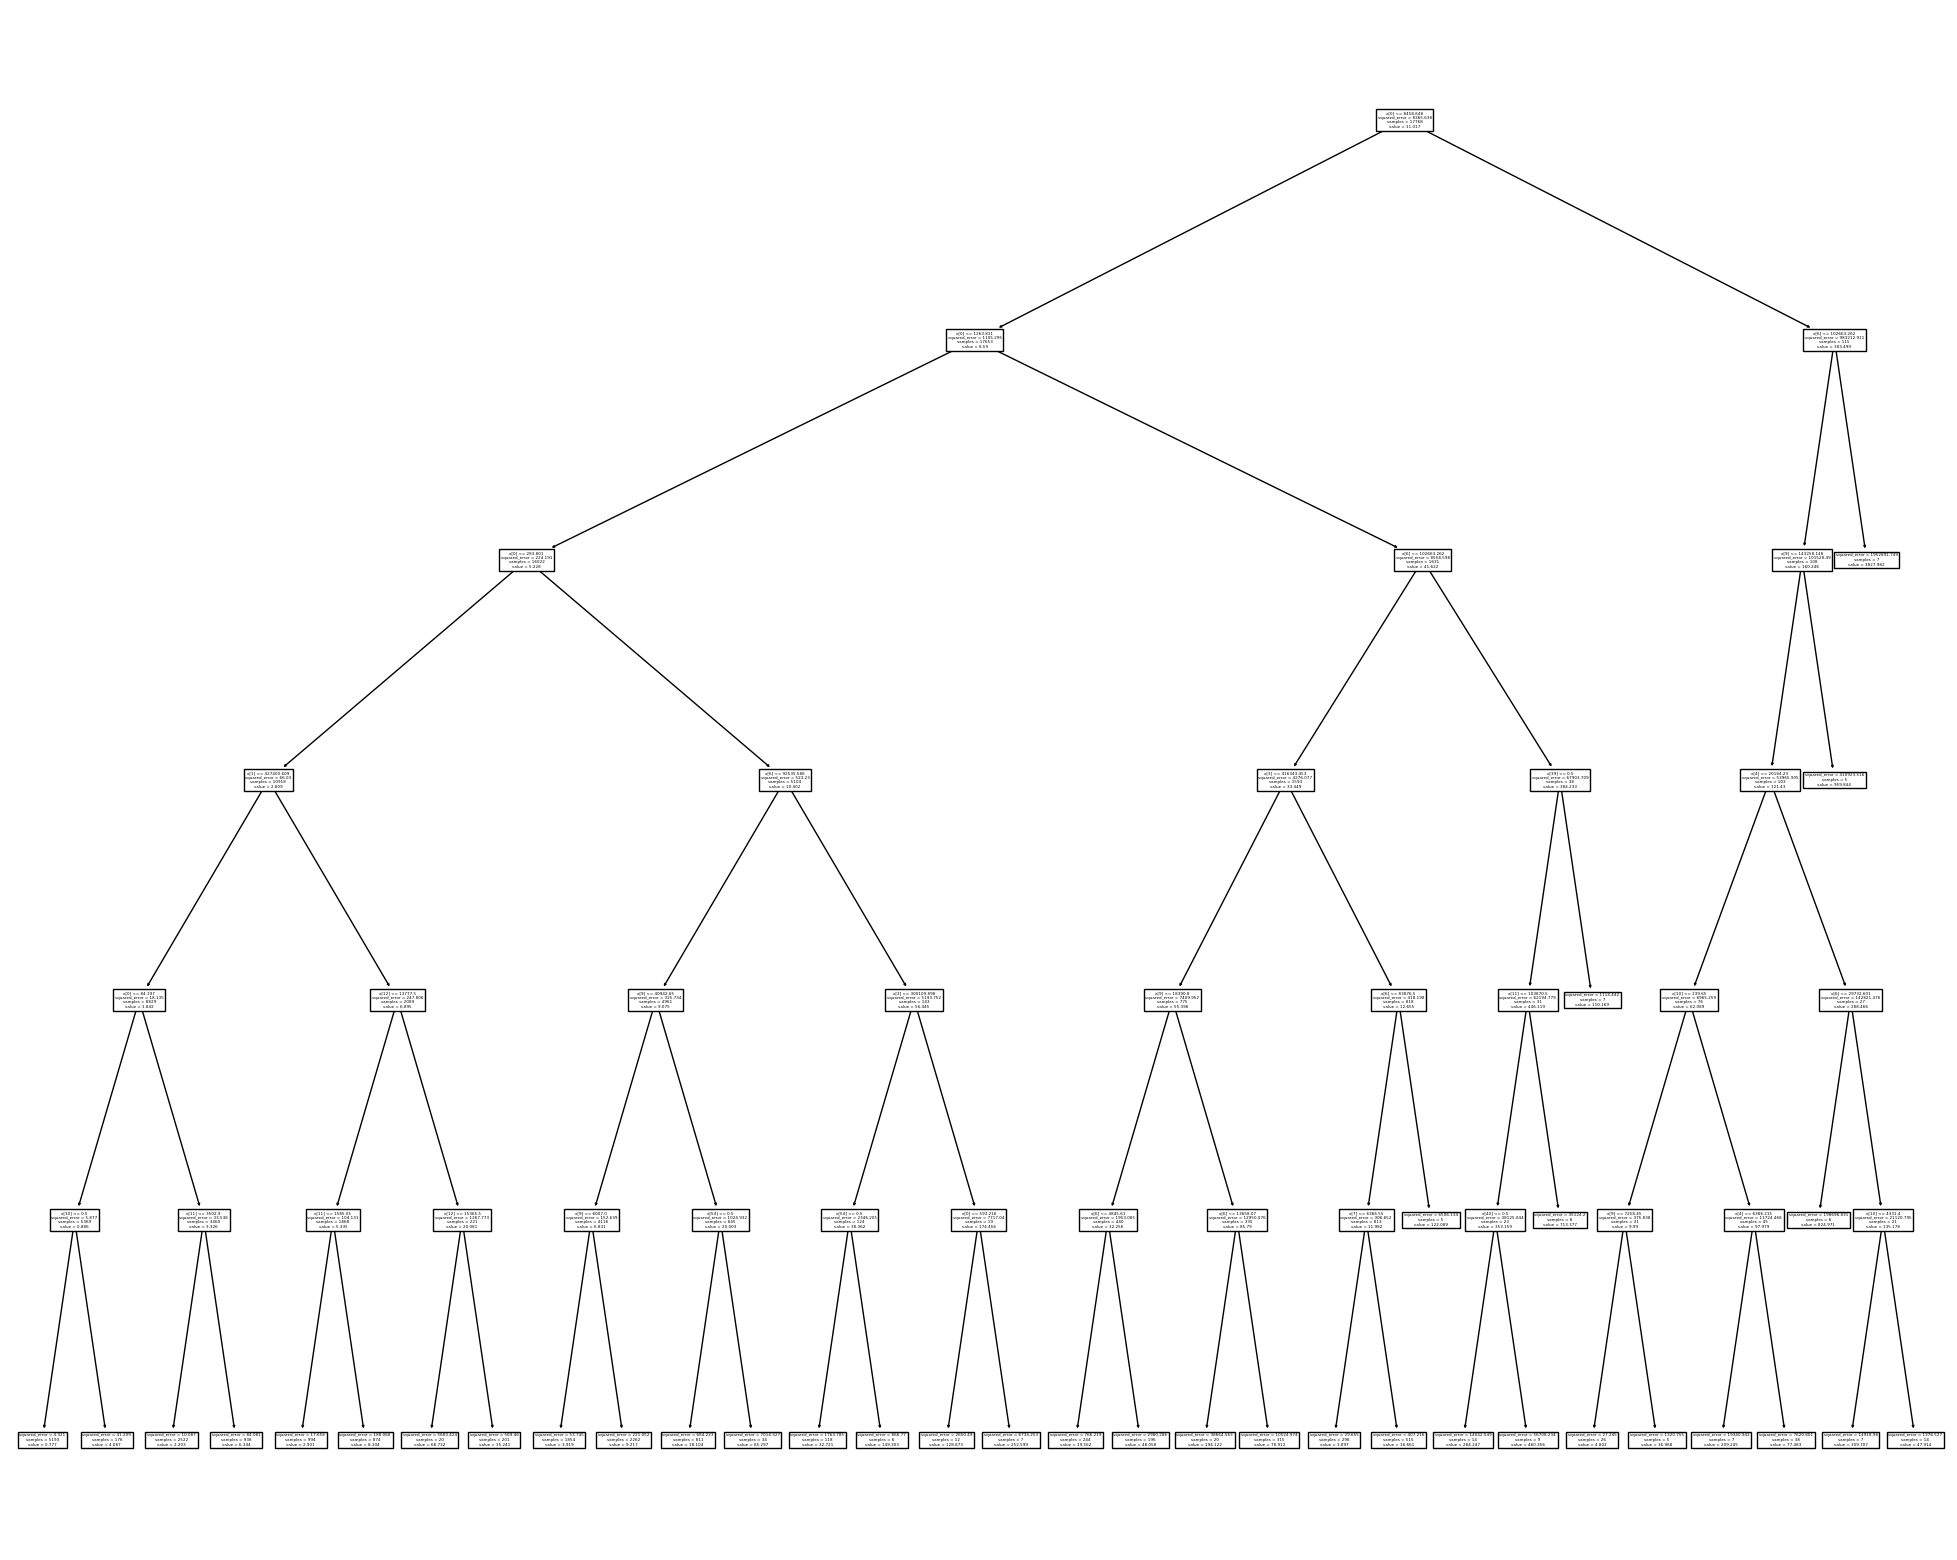

In [27]:
fig = plt.figure(figsize=(25,20))
plot_tree(model_cart)
plt.show()

### Features Analysis

In [2]:
df = pd.read_csv("../clean_data/final_df.csv", index_col= 0)
df.drop(["Company"], axis = 1, inplace = True)
df

,Device,Market,SubMarket,Year,Value,Spendings,DevSpends,MarketSpends,SubMarketSpends,Cogs,Cogs_1,Cogs_2,Revenue,Revenue_1,Revenue_2,Ebitda,Ebitda_1,Ebitda_2
0,Amplifier/Comparator,Industrial,Power & Energy,2018,7.466000,200.530,172603.835,744408.882,59122.300,19059.000000,17278.000000,17270.00,27662.00,25196.00,24929.0,3227.00,2929.00,2987.0
1,Amplifier/Comparator,Industrial,Power & Energy,2019,8.471900,189.490,163733.518,694336.713,56477.645,19018.000000,19059.000000,17278.00,27978.00,27662.00,25196.0,3347.00,3227.00,2929.0
2,Amplifier/Comparator,Industrial,Power & Energy,2020,8.661150,195.081,163007.011,715358.270,58137.779,18123.000000,19018.000000,19059.00,26134.00,27978.00,27662.0,2668.00,3347.00,3227.0
3,Amplifier/Comparator,Industrial,Power & Energy,2021,10.090255,240.245,212172.612,898036.093,67325.066,19407.000000,18123.000000,19018.00,28945.00,26134.00,27978.0,4641.00,2668.00,3347.0
4,Amplifier/Comparator,Industrial,Power & Energy,2022,10.040442,257.635,242620.053,1010453.110,73245.445,19712.000000,19407.000000,18123.00,29446.00,28945.00,26134.0,4477.00,4641.00,2668.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25932,Voltage Regulator/Reference,Consumer,Appliance,2020,10.295800,282.999,459595.802,185313.426,21204.000,758.240000,658.360000,518.61,1430.40,1214.00,1092.6,184.40,124.50,144.8
25933,Voltage Regulator/Reference,Consumer,Appliance,2021,17.639800,399.001,592814.876,245426.412,27436.000,1013.470000,758.240000,658.36,1565.00,1430.40,1214.0,43.40,184.40,124.5
25934,Voltage Regulator/Reference,Consumer,Appliance,2022,23.717500,469.001,651481.707,262578.290,33706.038,825.470000,1013.470000,758.24,1183.40,1565.00,1430.4,-173.70,43.40,184.4
25935,Voltage Regulator/Reference,Consumer,Appliance,2023,23.067700,412.999,623323.575,211583.273,25612.000,60182.035714,825.470000,1013.47,990.27,1183.40,1565.0,-175.67,-173.70,43.4


<AxesSubplot:>

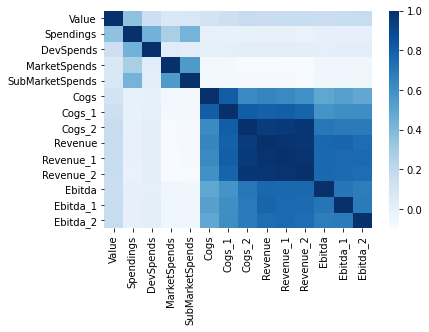

In [18]:
import seaborn as sn
corr_df = df.iloc[:, 4:]
sn.heatmap(corr_df.corr(), cmap="Blues")

### XGBoost

In [3]:
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [21]:
features = [x for x in list(df.columns) if not (x.endswith("1") or x.endswith("2"))]
features = ['Device',
 'Market',
 'SubMarket',
 'Year',
 'Value',
 'Spendings',
 'DevSpends',
 'MarketSpends',
 'SubMarketSpends',
 'Cogs',
 'Revenue',
 'Ebitda']

['Device',
 'Market',
 'SubMarket',
 'Year',
 'Value',
 'Spendings',
 'DevSpends',
 'MarketSpends',
 'SubMarketSpends',
 'Cogs',
 'Revenue',
 'Ebitda']

In [4]:
first_df = df[(df.Year <= 2022)]
y_train = np.array(first_df.Value)
X_train = first_df.drop("Value", axis = 1)
second_df = df[(df.Year >= 2023)]
y_test = np.array(second_df.Value)
X_test = second_df.drop("Value", axis = 1)

cat = ["Device", "Market", "SubMarket"]
full_pipeline = ColumnTransformer([('cat', OneHotEncoder(handle_unknown='ignore'), cat)], remainder='passthrough')
encoder = full_pipeline.fit(X_train)

In [21]:
tscv = TimeSeriesSplit(n_splits=5, test_size=1000, gap = 3)

num_estimators=[20, 30, 40, 50, 60]
max_depth = [3, 4, 5]
alpha = [0.5, 0.7, 1, 1.5]
lam = [0.5, 0.7, 1, 1.5]


init_lr = 0.3
def lr_decay(epoch):
    lr = init_lr*0.9**epoch   # *0.99 0.9 0.995 0.999
    return lr

lrs = xgboost.callback.LearningRateScheduler(lr_decay)

score = []
for num_esti in num_estimators:
    for md in max_depth:
        for a in alpha:
            for l in lam:
                res = [num_esti, md, a, l]
                rmse = []
                for train_index, test_index in tscv.split(X_train):
                    cv_train, cv_val = encoder.transform(X_train.iloc[train_index]), encoder.transform(X_train.iloc[test_index])
                    cv_y_train, cv_y_val = y_train[train_index], y_train[test_index]
                    #init_lr = eta
                    #callbacks = xgb.callback.LearningRateScheduler(lr_decay)
                    model = XGBRegressor(n_estimators = num_esti, max_depth = md, reg_alpha = a, reg_lambda = l, eta = 0.3)
                    model.fit(cv_train, cv_y_train) #, callbacks=[callbacks])
                    rmse.append(np.sqrt(mean_squared_error(model.predict(cv_val), cv_y_val)))
                res.append(np.mean(rmse))
                score.append(res)

num_estimators    60.00000
max_depth          4.00000
alpha              0.70000
lambda             0.50000
rmse              56.44188
Name: 212, dtype: float64


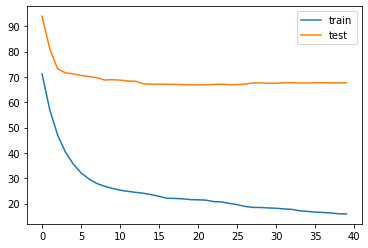

R2 score of the train set : 0.9674381530938568
R2 score of the train set : 0.5241724178380485


In [26]:
score = pd.DataFrame(score, columns = ["num_estimators", "max_depth", "alpha", "lambda","rmse"])
score.sort_values(by=['rmse'], ascending=False, inplace = True)
best_params = list(score.iloc[0, :])[:-1]
print(score.iloc[0, :])

evalset = [(encoder.transform(X_train), y_train), (encoder.transform(X_test),y_test)]
model = XGBRegressor(n_estimators = 40, max_depth = int(best_params[1]), reg_alpha = best_params[2], reg_lambda = best_params[3], eta = 0.3)
#init_lr = eta = best_params[5]
#callbacks = xgb.callback.LearningRateScheduler(lr_decay)
model.fit(encoder.transform(X_train), y_train, eval_set = evalset, verbose = 0)# , callbacks=[callbacks])
results = model.evals_result()
pyplot.plot(results['validation_0']['rmse'], label='train')
pyplot.plot(results['validation_1']['rmse'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print(f"R2 score of the train set : {r2_score(model.predict(encoder.transform(X_train)), y_train)}")
print(f"R2 score of the train set : {r2_score(model.predict(encoder.transform(X_test)), y_test)}")

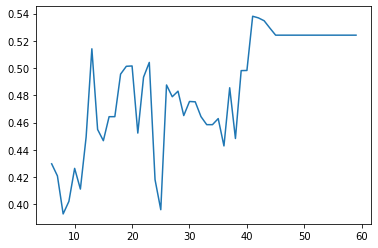

In [23]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort
thresholds = sort(model.feature_importances_)
score_r2 = []
nb_features = []
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(encoder.transform(X_train))
	# train model
	selection_model = XGBRegressor(n_estimators = int(best_params[0]), max_depth = int(best_params[1]), reg_alpha = best_params[2], reg_lambda = best_params[3], eta = 0.3)
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(encoder.transform(X_test))
	r2 = r2_score(selection_model.predict(select_X_test), y_test)
	score_r2.append(r2)
	nb_features.append(select_X_train.shape[1])
	#print("Thresh=%.3f, n=%d, R2: %.4f" % (thresh, select_X_train.shape[1], r2))
plt.plot(nb_features[:-5], score_r2[:-5])
plt.show()

### RF

In [76]:
from sklearn.ensemble import RandomForestRegressor
tscv = TimeSeriesSplit(n_splits=5, test_size=1000, gap = 3)

num_estimators=[30, 50, 60, 70, 100, 120, 150]
min_samples_split = [2, 3, 5, 7]
min_samples_leaf = [1, 3, 5]
max_features = ["sqrt", "log2", 1]


score = []
for num_esti in num_estimators:
    for mss in min_samples_split:
        for msl in min_samples_leaf:
            for mf in max_features:
                res = [num_esti, mss, msl, mf]
                rmse = []
                for train_index, test_index in tscv.split(X_train):
                    cv_train, cv_val = encoder.transform(X_train.iloc[train_index]), encoder.transform(X_train.iloc[test_index])
                    cv_y_train, cv_y_val = y_train[train_index], y_train[test_index]
                    #init_lr = eta
                    #callbacks = xgb.callback.LearningRateScheduler(lr_decay)
                    model = RandomForestRegressor(n_estimators = num_esti, min_samples_split = mss, min_samples_leaf = msl, max_features = mf)
                    model.fit(cv_train, cv_y_train) #, callbacks=[callbacks])
                    rmse.append(np.sqrt(mean_squared_error(model.predict(cv_val), cv_y_val)))
                res.append(np.mean(rmse))
                score.append(res)

In [79]:
score = pd.DataFrame(score, columns = ["num_estimators", "min_samples_split", "min_samples_leaf", "max_features","rmse"])
score.sort_values(by=['rmse'], ascending=False, inplace = True)
best_params = list(score.iloc[0, :])[:-1]
print(score.iloc[0, :])

model = RandomForestRegressor(n_estimators = int(best_params[0]), min_samples_split = int(best_params[1]), min_samples_leaf = best_params[2], max_features = best_params[3])
model.fit(encoder.transform(X_train), y_train)# , callbacks=[callbacks])
print(f"R2 score of the train set : {r2_score(model.predict(encoder.transform(X_train)), y_train)}")
print(f"R2 score of the test set : {r2_score(model.predict(encoder.transform(X_test)), y_test)}")

num_estimators              70
min_samples_split            7
min_samples_leaf             1
max_features                 1
rmse                 56.649294
Name: 137, dtype: object
R2 score of the train set : 0.0828577033340786
R2 score of the train set : -1.1699210157776876


### PCA + Models

In [6]:
from sklearn.decomposition import PCA, TruncatedSVD

Elbow criteria

In [10]:
tscv = TimeSeriesSplit(n_splits=5, test_size=1000, gap = 3)

num_estimators=[50]
max_depth = [5]
alpha = [1.5]
lam = [1.5]
nb_components = [i for i in range(5, 15)]

score = []
for num_esti in num_estimators:
    for md in max_depth:
        for a in alpha:
            for l in lam:
                for nb_compo in nb_components :
                    res = [num_esti, md, a, l, nb_compo]
                    rmse = []
                    for train_index, test_index in tscv.split(X_train):
                        cv_train, cv_val = encoder.transform(X_train.iloc[train_index]), encoder.transform(X_train.iloc[test_index])
                        cv_y_train, cv_y_val = y_train[train_index], y_train[test_index]
                        #init_lr = eta
                        pca = TruncatedSVD(n_components = nb_compo)
                        train_pca = pca.fit_transform(cv_train)
                        #callbacks = xgb.callback.LearningRateScheduler(lr_decay)
                        model = XGBRegressor(n_estimators = num_esti, max_depth = md, reg_alpha = a, reg_lambda = l)
                        model.fit(train_pca, cv_y_train) #, callbacks=[callbacks])
                        rmse.append(np.sqrt(mean_squared_error(model.predict(pca.transform(cv_val)), cv_y_val)))
                    res.append(np.mean(rmse))
                    score.append(res)

num_estimators    50.00000
max_depth          5.00000
alpha              1.50000
lambda             1.50000
nb_components     11.00000
rmse              58.53721
Name: 6, dtype: float64


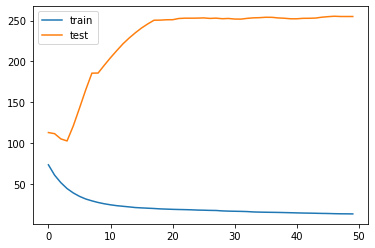

R2 score of the train set : 0.9767787905039392
R2 score of the test set : -0.01863499345159414


In [14]:
score = pd.DataFrame(score, columns = ["num_estimators", "max_depth", "alpha", "lambda", "nb_components", "rmse"])
score.sort_values(by=['rmse'], ascending=False, inplace = True)
best_params = list(score.iloc[0, :])[:-1]
print(score.iloc[0, :])

pca = TruncatedSVD(n_components = nb_compo)
pca.fit(encoder.transform(X_train))
evalset = [(pca.transform(encoder.transform(X_train)), y_train), (pca.transform(encoder.transform(X_test)),y_test)]
model = XGBRegressor(n_estimators = int(best_params[0]), max_depth = int(best_params[1]), reg_alpha = best_params[2], reg_lambda = best_params[3], eta = 0.3)
#init_lr = eta = best_params[5]
#callbacks = xgb.callback.LearningRateScheduler(lr_decay)
model.fit(pca.transform(encoder.transform(X_train)), y_train, eval_set = evalset, verbose = 0)# , callbacks=[callbacks])
results = model.evals_result()
pyplot.plot(results['validation_0']['rmse'], label='train')
pyplot.plot(results['validation_1']['rmse'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print(f"R2 score of the train set : {r2_score(model.predict(pca.transform(encoder.transform(X_train))), y_train)}")
print(f"R2 score of the test set : {r2_score(model.predict(pca.transform(encoder.transform(X_test))), y_test)}")

Kaiser Criteria

In [18]:
tscv = TimeSeriesSplit(n_splits=5, test_size=1000, gap = 3)

num_estimators=[30, 40, 50, 60]
max_depth = [3, 4, 5]
alpha = [0.7, 1, 1.5]
lam = [0.7, 1, 1.5]

pca = TruncatedSVD()
pca.fit(encoder.transform(X_train))
eigenvalues = pca.explained_variance_
nb_components = np.sum(eigenvalues > 1.0)

score = []
for num_esti in num_estimators:
    for md in max_depth:
        for a in alpha:
            for l in lam:
                res = [num_esti, md, a, l]
                rmse = []
                for train_index, test_index in tscv.split(X_train):
                    cv_train, cv_val = encoder.transform(X_train.iloc[train_index]), encoder.transform(X_train.iloc[test_index])
                    cv_y_train, cv_y_val = y_train[train_index], y_train[test_index]
                    #init_lr = eta
                    pca = TruncatedSVD(n_components = nb_components)
                    train_pca = pca.fit_transform(cv_train)
                    #callbacks = xgb.callback.LearningRateScheduler(lr_decay)
                    model = XGBRegressor(n_estimators = num_esti, max_depth = md, reg_alpha = a, reg_lambda = l, eta = 0.3)
                    model.fit(cv_train, cv_y_train) #, callbacks=[callbacks])
                    rmse.append(np.sqrt(mean_squared_error(model.predict(cv_val), cv_y_val)))
                res.append(np.mean(rmse))
                score.append(res)

num_estimators    50.000000
max_depth          4.000000
alpha              1.500000
lambda             0.700000
rmse              56.220991
Name: 69, dtype: float64


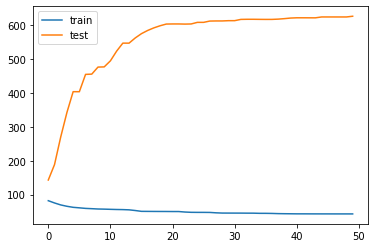

R2 score of the train set : 0.6906190922286009
R2 score of the test set : -0.05419151690776847


In [20]:
score = pd.DataFrame(score, columns = ["num_estimators", "max_depth", "alpha", "lambda", "rmse"])
score.sort_values(by=['rmse'], ascending=False, inplace = True)
best_params = list(score.iloc[0, :])[:-1]
print(score.iloc[0, :])

pca = TruncatedSVD(n_components = nb_components)
pca.fit(encoder.transform(X_train))
evalset = [(pca.transform(encoder.transform(X_train)), y_train), (pca.transform(encoder.transform(X_test)),y_test)]
model = XGBRegressor(n_estimators = int(best_params[0]), max_depth = int(best_params[1]), reg_alpha = best_params[2], reg_lambda = best_params[3], eta = 0.3)
#init_lr = eta = best_params[5]
#callbacks = xgb.callback.LearningRateScheduler(lr_decay)
model.fit(pca.transform(encoder.transform(X_train)), y_train, eval_set = evalset, verbose = 0)# , callbacks=[callbacks])
results = model.evals_result()
pyplot.plot(results['validation_0']['rmse'], label='train')
pyplot.plot(results['validation_1']['rmse'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print(f"R2 score of the train set : {r2_score(model.predict(pca.transform(encoder.transform(X_train))), y_train)}")
print(f"R2 score of the test set : {r2_score(model.predict(pca.transform(encoder.transform(X_test))), y_test)}")

# Changement Dataset for IAI

In [50]:
df = pd.read_csv("../clean_data/final_df.csv", index_col= 0)
df.drop(["Company"], axis = 1, inplace = True)
cols = df.columns.to_list()
cols.pop(4)
cols += ["Value"]
df = df[cols]
df_train = df[(df.Year <= 2022)]
df_test = df[(df.Year > 2022)]
df_train.drop(["Year"], axis = 1, inplace = True)
df_test.drop(["Year"], axis = 1, inplace = True)
df_train.to_csv("IAI_train2.csv")
df_test.to_csv("IAI_test2.csv")

/var/folders/px/tjlhxsg56bg6d74d3c4cnhrc0000gn/T/ipykernel_56238/2313071825.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(["Year"], axis = 1, inplace = True)
/var/folders/px/tjlhxsg56bg6d74d3c4cnhrc0000gn/T/ipykernel_56238/2313071825.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(["Year"], axis = 1, inplace = True)
